## 从蒙特卡洛模拟到机器学习 -- 数学模拟与随机在算法中的意义

## Simulation 模拟

### 1.第一个简单案例 $\pi$的模拟

以某个中心点位圆心，画圆半径假设是0.5, 我们把这个圆归置到 1个 1 X 1的正方形中。 

任意的在这个正方向里扔小点，圆形的面积是：$ \pi r ^ 2$, 进入圆形里的小点的比例： 

$$ Pr(Point_{in}) = \pi r ^ 2 $$
$$ \frac{Count(在圆内)}{Count(整体)} = \pi r ^ 2 $$

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plot

In [3]:
import numpy as np

In [25]:
np.random.uniform(0, 1, size=(1, 2))

array([[0.3212918 , 0.53076812]])

In [41]:
radius = 0.5
mid_x, mid_y = 0.5, 0.5

in_the_circle = 0

total_testing = 1e6

for i in range(int(total_testing)):
    x, y = np.random.uniform(0, 1, size=(1, 2))[0]

    if np.sqrt((x - mid_x) ** 2 + (y - mid_y) ** 2) < radius:
        in_the_circle += 1
    
print(in_the_circle)
print(f'π = {in_the_circle / (total_testing * (radius**2))}')

785088
π = 3.140352


$$ \frac{in\_the\_circle}{total} = \pi r ^ 2 $$

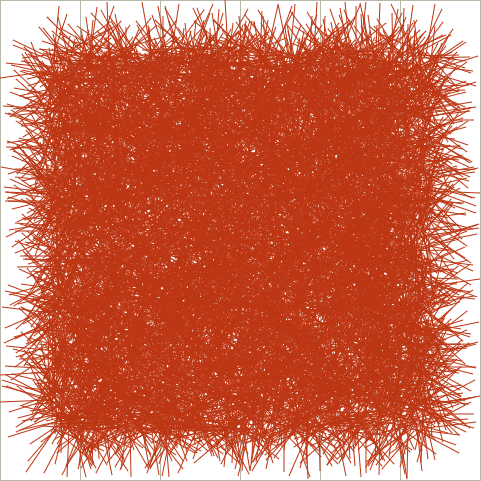

## 扎金花

In [193]:
COLORS = "♠️ ♣️ ♥️ ♦️".split()

In [194]:
NUMBERS = "2 3 4 5 6 7 8 9 10 J Q K A".split()

## 牌色：

1. 对子： 3张牌里边，仅有两张是一样的，例如 998，10 10 J
2. 顺子： 456， 789。 A23， QKA(A既可以做14，也可以做1， 当且仅当和2，3一起出现的时候，作为1)
3. 同花： 三张牌的牌色是一样的，但是呢三张牌的数字，不是顺子
4. 同花顺：牌的大小是顺子，牌的颜色是同花
5. 豹子：三张牌的一样的
6. 若都不是上边的，则按照牌最大的开始进行逐个对比。 JKA，10KA

## Q：

### 1. 同花的概率和顺子的概率，哪个大？
### 2. 假设有5个人玩，那么，一局中出现对子的概率是多少？ 
### 3. 至少多少人一起玩，每一局中既不出现对子，也不出现顺子，也不出现同花的概率是小于50%的

In [44]:
import random

In [195]:
def gen_card():
    return random.choice(COLORS) + random.choice(NUMBERS)

In [199]:
gen_card()

'♣️K'

In [200]:
def gen_hand():
    return [gen_card() for _ in range(3)]

In [208]:
gen_hand()

['♠️A', '♣️9', '♠️K']

In [269]:
def get_numbers_and_colors(hand):
    colors, numbers = [], []
    for card in hand:
        c = card[:2]
        n = card[-1]
        colors.append(c)
        numbers.append(n)
    
    #print(f"cards are {hand}, number == {numbers}, colors == {colors}")
    return numbers, colors

In [270]:
gen_hand()

['♣️A', '♥️7', '♥️9']

In [271]:
get_numbers_and_colors(gen_hand())

(['A', '2', '8'], ['♥️', '♦️', '♦️'])

In [261]:
def is_success_hand(numbers):
    number_map = {
        'A': [1, 14],
        'J': [11], 
        'Q': [12],
        'K': [13]
    }
    
    numbers_with_real_number = []
    
    for n in numbers:
        if n in number_map:
            numbers_with_real_number.append(number_map[n])
        else:
            numbers_with_real_number.append([int(n)])
    
    is_chain = False
    
    for p in product(*numbers_with_real_number):
        sp = sorted(p)
        if sp[0] - sp[1] == sp[1] - sp[2] == -1:
            is_chain = True
            break
            
    return is_chain

In [262]:
t_cards = [
    ('9', '8', '6'),
    ('10', 'J', 'K'),
    ('10', 'J', 'Q'),
    ('Q', 'K', 'A'),
    ('A', '3', '2'),
    ('A', '3', '4')
]

for c in t_cards:
    chain = is_success_hand(c)
    print(f"{c} -- {chain}")

('9', '8', '6') -- False
('10', 'J', 'K') -- False
('10', 'J', 'Q') -- True
('Q', 'K', 'A') -- True
('A', '3', '2') -- True
('A', '3', '4') -- False


In [263]:
from itertools import product

In [264]:
for p in product(*[[8], [13], [1, 14]]):
    print(p)

(8, 13, 1)
(8, 13, 14)


In [294]:
def 是对子(hand):
    numbers, colors = get_numbers_and_colors(hand)
    return len(set(numbers)) == 2

def 是同花(hand):
    numbers, colors = get_numbers_and_colors(hand)
    return len(set(colors)) == 1 and not is_success_hand(numbers)

def 是顺子(hand):
    numbers, colors = get_numbers_and_colors(hand)
    
    return len(set(colors)) > 1 and is_success_hand(numbers)

def 是同花顺(hand):
    numbers, colors = get_numbers_and_colors(hand)
    
    return len(set(colors)) == 1 and is_success_hand(numbers)

def 是豹子(hand):
    numbers, colors = get_numbers_and_colors(hand)

    return len(set(numbers)) == 1

In [295]:
get_numbers_and_colors(gen_hand())

(['4', 'Q', '8'], ['♥️', '♠️', '♦️'])

In [296]:
from collections import defaultdict

In [332]:
def get_discribute_from_hands(hands):
#total_testing = 1e5
    categories_number = defaultdict(int)
    for card in hands:
        #card = gen_hand()

        functions = [
           是对子,  是同花, 是顺子, 是同花顺, 是豹子
        ]

        for f in functions:
            if f(card):
               # print(f"{'-'.join(card)} ： {f.__name__}")
                categories_number[f.__name__] += 1
                break
        else:
            name = '啥也不是'
    #        print(f"{'-'.join(card)} ： {name}")
            categories_number[name] += 1

    return categories_number

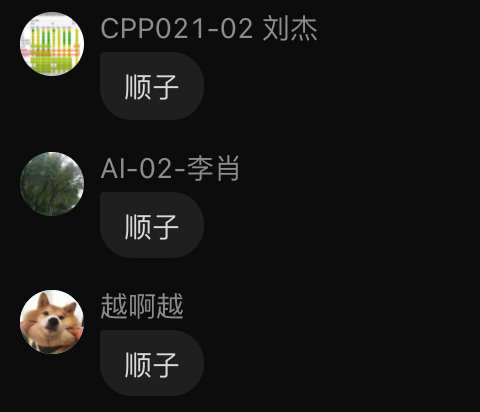

In [333]:
dis = get_discribute_from_hands([gen_hand() for _ in range(int(1e5))])

In [334]:
import matplotlib.pyplot as plt

In [335]:
dis

defaultdict(int,
            {'是对子': 21434,
             '啥也不是': 70580,
             '是豹子': 560,
             '是顺子': 2522,
             '是同花': 4752,
             '是同花顺': 152})

In [336]:
keys, values = list(zip(*[(k, v) for k, v in dis.items()]))
print(keys, values)

('是对子', '啥也不是', '是豹子', '是顺子', '是同花', '是同花顺') (21434, 70580, 560, 2522, 4752, 152)


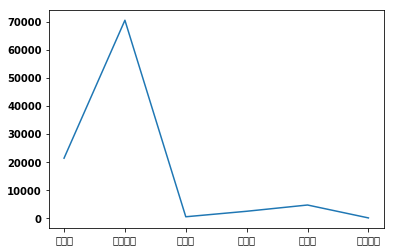

In [337]:
plt.plot(keys, values)

In [338]:
for k, v in dis.items():
    print(f"{k}的概率是{v / total_testing * 100 }%")

是对子的概率是21.434%
啥也不是的概率是70.58%
是豹子的概率是0.5599999999999999%
是顺子的概率是2.522%
是同花的概率是4.752%
是同花顺的概率是0.152%


### 假设有5个人玩，那么，一局中出现对子的概率是多少？

In [339]:
def 出现对子(hands):
    return 是对子.__name__ in get_discribute_from_hands(hands)        

In [347]:
hands = [gen_hand() for _ in range(3)]
print(hands)
print(get_discribute_from_hands(hands))
出现对子(hands)

[['♦️10', '♥️3', '♠️5'], ['♠️10', '♠️3', '♦️9'], ['♠️4', '♥️2', '♥️3']]
defaultdict(<class 'int'>, {'啥也不是': 2, '是顺子': 1})


False

In [360]:
test_time = 1e3

result = 0
K = 3
for i in range(int(test_time)):
    t_hands = [gen_hand() for _ in range(K)]
    if 出现对子(t_hands):
        result += 1

print(f'{K}个人玩出现对子的概率是{result / test_time * 100}%')

3个人玩出现对子的概率是53.0%


## 中心极限定理

任意的概率部分，当测试足够多的时候，就会成为正态分布.

In [373]:
def uniform(begin, end):
    return int(np.random.uniform(begin, end))

In [397]:
counts = defaultdict(int)


for i in range(int(1e6)):
    counts[uniform(0, 500)] += 1

(array([ 1.,  1.,  0.,  2.,  1.,  3.,  3.,  2.,  2.,  2.,  7.,  7.,  6.,
         6.,  9., 11., 15., 12., 15., 21., 19., 15., 20., 14., 19., 13.,
        19., 29., 20., 18., 23., 16., 19., 16., 15., 12.,  6., 13., 15.,
        12.,  6.,  8.,  8.,  3.,  4.,  3.,  4.,  2.,  2.,  1.]),
 array([1872.  , 1876.78, 1881.56, 1886.34, 1891.12, 1895.9 , 1900.68,
        1905.46, 1910.24, 1915.02, 1919.8 , 1924.58, 1929.36, 1934.14,
        1938.92, 1943.7 , 1948.48, 1953.26, 1958.04, 1962.82, 1967.6 ,
        1972.38, 1977.16, 1981.94, 1986.72, 1991.5 , 1996.28, 2001.06,
        2005.84, 2010.62, 2015.4 , 2020.18, 2024.96, 2029.74, 2034.52,
        2039.3 , 2044.08, 2048.86, 2053.64, 2058.42, 2063.2 , 2067.98,
        2072.76, 2077.54, 2082.32, 2087.1 , 2091.88, 2096.66, 2101.44,
        2106.22, 2111.  ]),
 <a list of 50 Patch objects>)

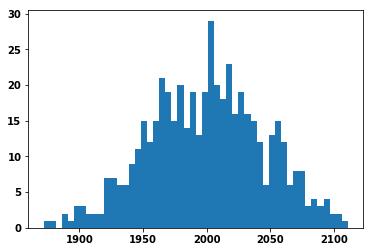

In [401]:
plt.hist(counts.values(), bins=50)

## Exchange Simulation

In [411]:
def exchange(persons):
    r=random.randint
    
    i, j = r(0, len(persons)-1), r(0, len(persons)-1)
    
    persons[i] -= 1
    persons[j] += 1
    
    return persons

In [464]:
persons = [100 for i in range(10000)]

for i in range(1000000):
    exchange(persons)

(array([5.000e+00, 6.000e+00, 2.100e+01, 8.200e+01, 1.620e+02, 3.730e+02,
        7.490e+02, 9.100e+02, 1.430e+03, 1.398e+03, 1.598e+03, 1.380e+03,
        7.870e+02, 6.070e+02, 2.680e+02, 1.420e+02, 5.900e+01, 1.600e+01,
        6.000e+00, 1.000e+00]),
 array([ 45. ,  50.6,  56.2,  61.8,  67.4,  73. ,  78.6,  84.2,  89.8,
         95.4, 101. , 106.6, 112.2, 117.8, 123.4, 129. , 134.6, 140.2,
        145.8, 151.4, 157. ]),
 <a list of 20 Patch objects>)

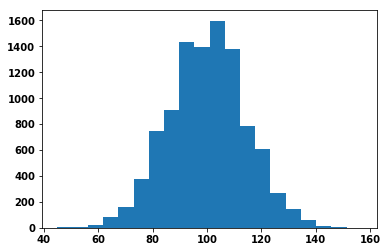

In [467]:
plt.hist(persons, bins=20)

## 怎么映射到了机器学习上？ 

In [468]:
from sklearn.datasets import load_boston

In [469]:
data = load_boston()['data']

In [480]:
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [483]:
RM = data[:, 5]

In [484]:
PRICE = load_boston()['target']

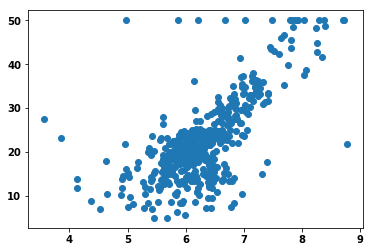

In [485]:
plt.scatter(RM, PRICE)

In [487]:
def price(rm, k, b): 
    return rm * k + b

In [500]:
def loss(predict, true):
    return np.mean((predict - true) ** 2)

$$ loss(predict, ytrue) = \frac{1}{n} \sum_{i \in N}{(predict_i - ytrue_i)^2} $$
$$ loss(predict, ytrue) = \frac{1}{n} \sum_{i \in N}{(k * x_i + b - ytrue_i)^2} $$

In [502]:
loss(np.array([1, 2, 2, 4]), np.array([4, 3, 3, 2]))

3.75

In [616]:
def partial_k(k, b, ytrue, x):
    return 2 * np.mean((k * x + b - ytrue) * x)

def partial_b(k, b, ytrue, x):
    return 2 * np.mean(k * x + b - ytrue)

In [610]:
rk, rb

(-13.250942651207609, -10.522960685378962)

In [611]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


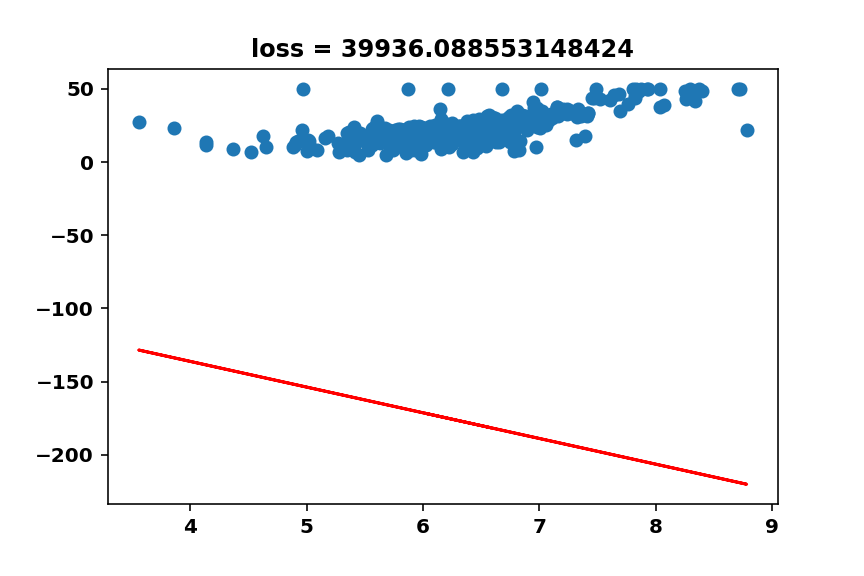

Text(0.5, 1.0, 'loss = 959.2388671701098')

In [617]:
    rk, rb = np.random.uniform(-100, 100, size=(1, 2))[0]
    predict = price(RM, rk, rb)
    current_loss = loss(predict, PRICE)
    if current_loss < best_loss:
        best_k, best_b = rk, rb
        best_loss = current_loss
        
    plt.clf()
    plt.plot(RM, price(RM, best_k, best_b), color='r')
    plt.scatter(RM, PRICE)
    plt.title(f"loss = {best_loss}")

In [590]:
%matplotlib notebook

<IPython.core.display.Javascript object>


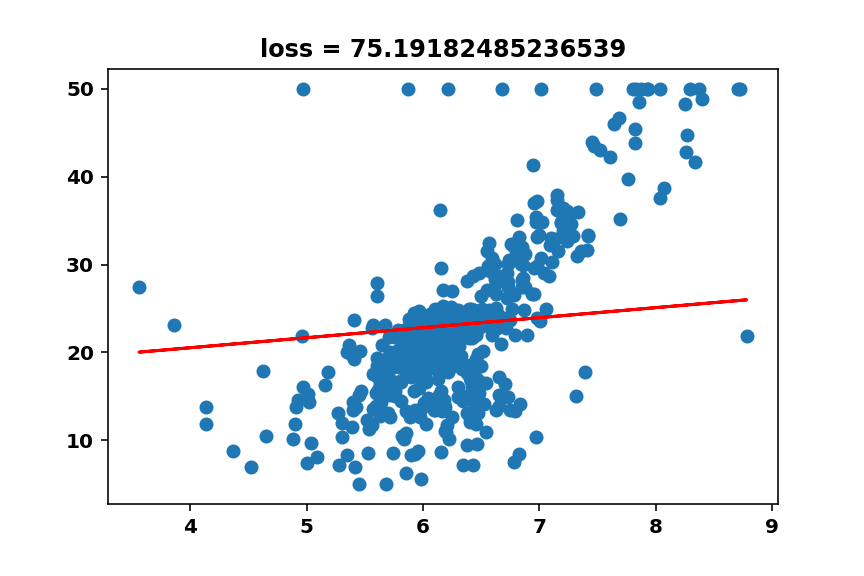

In [620]:
best_loss = float('inf')
_k, _b = np.random.uniform(-100, 100, size=(1, 2))[0]


def once_test(i):
    #rk, rb = 
    global best_loss, _k, _b

    p_k, p_b = partial_k(_k, _b, PRICE, RM), partial_b(_k, _b, PRICE, RM)
    
    _k = _k + -1 * p_k * 1e-3
    _b = _b + -1 * p_b * 1e-3
    
    predict = price(RM, _k, _b)
    current_loss = loss(predict, PRICE)
    
    
    if current_loss < best_loss:
        best_loss = current_loss
        best_k, best_b = _k, _b
        
        print(f"best_loss = {best_loss}")

        plt.clf()
        plt.scatter(RM, PRICE)
        plt.plot(RM, price(RM, best_k, best_b), color='r')
        plt.title(f"loss = {best_loss}")


fig = plt.gcf()
ani = FuncAnimation(fig, once_test, interval=10)
plt.show()

In [618]:
best_loss = float('inf')
best_k, best_b = None, None


def once_test(i):
    rk, rb = np.random.uniform(-100, 100, size=(1, 2))[0]
    predict = price(RM, rk, rb)
    current_loss = loss(predict, PRICE)
    if current_loss < best_loss:
        best_k, best_b = rk, rb
       # best_loss = current_loss
        print(current_loss)
    
    plt.clf()
    plt.scatter(RM, PRICE)
    if best_k and best_b: 
        plt.plot(RM, price(RM, best_k, best_b), color='r')
        plt.title(f"loss = {current_loss}")
        

fig = plt.gcf()
ani = FuncAnimation(fig, once_test, interval=10)
plt.show()